In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium



In [ ]:
# Load zimbabwe TB csv data
zimbabwe_tb=pd.read_csv('/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv')
zimbabwe_tb.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,COUNTRY (CODE),COUNTRY (DISPLAY),COUNTRY (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,#indicator+code,#indicator+name,#indicator+url,#status+code,#status+name,NaN,NaN,#date+year,NaN,#region+code,...,#country+code,#country+name,NaN,NaN,#indicator+value+num,NaN,NaN,NaN,NaN,NaN
1,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,PUBLISHED,Published,NaN,2000.0,2000,NaN,AFR,...,ZWE,Zimbabwe,NaN,39 [33-49],39.00000,33.0,49.0,NaN,NaN,NaN
2,MDG_0000000030,Smear-positive tuberculosis case-detection rat...,NaN,PUBLISHED,Published,NaN,2008.0,2008,NaN,AFR,...,ZWE,Zimbabwe,NaN,24 [20-30],24.00000,20.0,30.0,NaN,NaN,NaN
3,TB_tot_newrel,Tuberculosis - new and relapse cases (TB_c_new...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1990.0,1990,NaN,AFR,...,ZWE,Zimbabwe,NaN,9132,9132.00000,NaN,NaN,NaN,NaN,NaN
4,TB_tot_newrel,Tuberculosis - new and relapse cases (TB_c_new...,https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,1992.0,1992,NaN,AFR,...,ZWE,Zimbabwe,NaN,16237,16237.00000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Load zimbabwe Study Area data shapefile
zimbabwe_shp = gpd.read_file('/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp')
zimbabwe_shp.head()


,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,256,ZWE,Zimbabwe,1,Bulawayo,City,City,None,None,"POLYGON ((28.61305 -20.23587, 28.60440 -20.225..."
1,256,ZWE,Zimbabwe,2,Harare,City,City,None,None,"POLYGON ((31.08852 -17.66625, 31.11038 -17.667..."
2,256,ZWE,Zimbabwe,3,Manicaland,Province,Province,None,None,"POLYGON ((32.97599 -17.55177, 32.98143 -17.562..."
3,256,ZWE,Zimbabwe,4,Mashonaland Central,Province,Province,None,None,"POLYGON ((30.42539 -15.64776, 30.42560 -15.665..."
4,256,ZWE,Zimbabwe,5,Mashonaland East,Province,Province,None,None,"POLYGON ((32.86868 -16.70853, 32.87693 -16.713..."


<Axes: >

<Figure size 1200x1000 with 0 Axes>

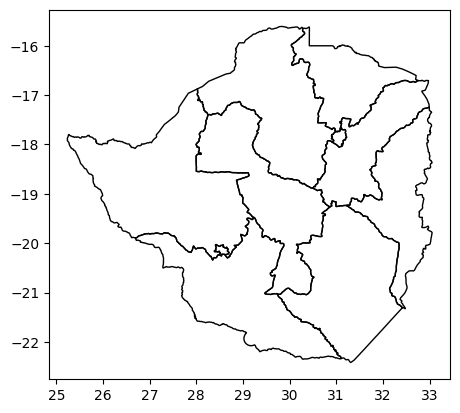

In [ ]:
import folium
#Plotting the zimbabwe map
zimbabwe_shp = gpd.read_file('/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp')

map_center = [19.0154, 29.1549]#latitude and longitude of zimbabwe
zimbabwe_map = folium.Map(location=map_center, zoom_start=10)
folium.Marker(location=map_center, popup="zimbabwe").add_to(zimbabwe_map)
plt.figure(figsize=(12,10))
zimbabwe_shp.plot(color='none', edgecolor='black')


**Code Explanation**

The code begins by loading the tuberculosis indicators data from a CSV file (tuberculosis_indicators_zwe.csv) and the shapefile for Zimbabwe boundaries (ZWE_adm1.shp).
Rows with missing values in the "Low" and "High" columns of the tuberculosis indicators data are dropped.

The tuberculosis indicators data is converted into a GeoDataFrame, and the points are represented as geometries (longitude and latitude).
gaussian_kde from scipy.stats is used to perform kernel density estimation on the geographical coordinates.

**Kernel Density Heatmap Explanation**

The kernel density heatmap visually represents the spatial distribution of tuberculosis indicators in Zimbabwe. Areas with higher density values on the heatmap indicate regions where tuberculosis indicators are concentrated, while lower density areas represent regions with fewer indicators.


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


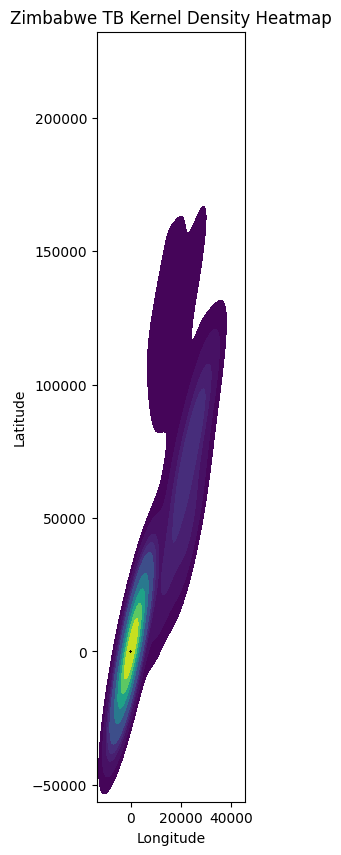

In [9]:
# Load necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV data
zimbabwe_tb = pd.read_csv("/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv")  # Update with your file path

# Drop rows with missing values
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)

# Load shapefile for boundaries
boundaries_gdf = gpd.read_file("/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp")

# Perform kernel density estimation
kernel_density_gdf = gpd.GeoDataFrame(zimbabwe_tb, geometry=gpd.points_from_xy(zimbabwe_tb["Low"], zimbabwe_tb["High"]))
kernel_density_gdf.crs = {'init': 'epsg:4326'}  # Assuming WGS84 coordinate system
kernel_density_gdf = kernel_density_gdf.to_crs(boundaries_gdf.crs)  # Ensure both datasets are using same CRS

# Plot kernel density heatmap
fig, ax = plt.subplots(figsize=(15,10))

sns.kdeplot(
    data=kernel_density_gdf,
    x="Low",
    y="High",
    fill=True,
    cmap="viridis",
    ax=ax,
)

boundaries_gdf.plot(ax=ax, color="none", edgecolor="black")  # Plot boundaries

plt.title("Zimbabwe TB Kernel Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()



The provided Python code employs K-means clustering to analyze tuberculosis (TB) data in Zimbabwe. After loading the TB data from a CSV file and dropping rows with missing values, the code extracts latitude and longitude coordinates. K-means clustering is then applied to these coordinates, dividing them into five clusters by default. Boundaries of Zimbabwe's administrative regions are loaded from a shapefile, and the clustering results are plotted on a map using GeoPandas. Each cluster is visualized as a scatter plot with distinct colors and labels, allowing for the identification of spatial patterns in TB cases across Zimbabwe.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

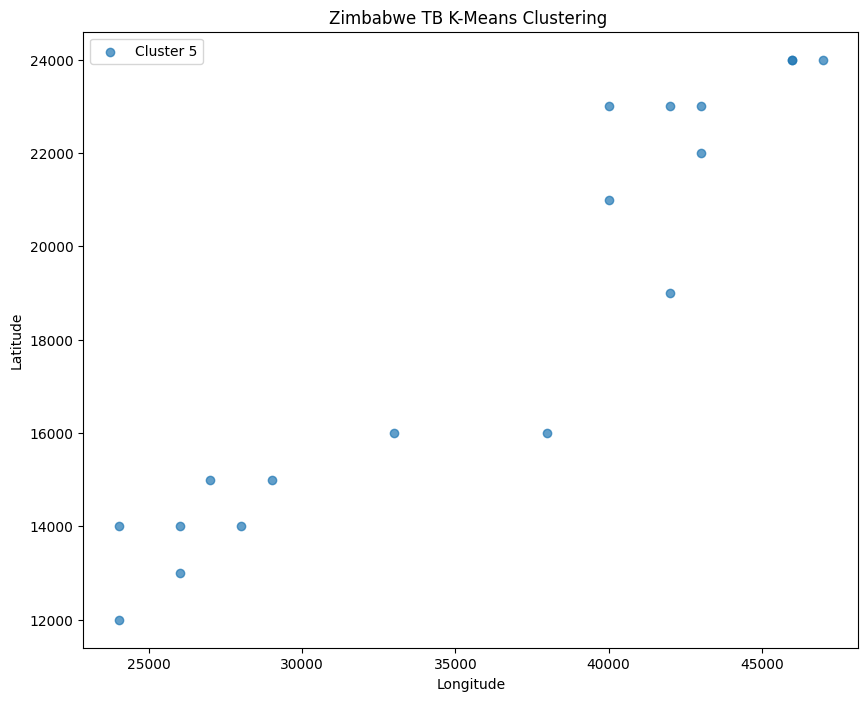

In [15]:
# Install necessary libraries

import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load shapefile for boundaries
boundaries_gdf = gpd.read_file("/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp")
plt.show()

boundaries_gdf.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plot boundaries


# Load CSV data
zimbabwe_tb = pd.read_csv("/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv")

# Drop rows with missing values
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)

X = zimbabwe_tb[['High', 'Low']].values

# Perform k-means clustering
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters as needed
clusters = kmeans.fit_predict(X)

# Plot clustering results on map
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot for each cluster
for cluster_label in range(len(np.unique(clusters))):
    cluster_data = X[clusters == cluster_label]
ax.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label + 1}', alpha=0.7)

ax.set_title('Zimbabwe TB K-Means Clustering ')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()


This code utilizes GeoPandas, Pandas, NumPy, and Matplotlib to analyze the mean center of tuberculosis (TB) data in Zimbabwe. Initially, it loads a shapefile containing the boundaries of Zimbabwe's administrative regions using GeoPandas and plots it on a map. Then, TB data is loaded from a CSV file, and rows with missing values in the "Low" and "High" columns are dropped. The latitude and longitude coordinates are extracted from the data. Next, the mean center of the TB cases is calculated using NumPy's np.mean() function. Finally, a scatter plot is created to visualize the TB data points on the map, with the mean center marked in red. The plot provides insights into the spatial distribution of TB cases in Zimbabwe, highlighting the central tendency of TB occurrences in the region.

The mean center analysis visually demonstrates the geographic concentration of TB cases in Zimbabwe. The blue data points represent individual TB occurrences across the country, while the red point denotes the calculated mean center of these occurrences. The mean center serves as a spatial summary statistic, indicating the central tendency of TB cases distribution within the country.

<Figure size 640x480 with 0 Axes>

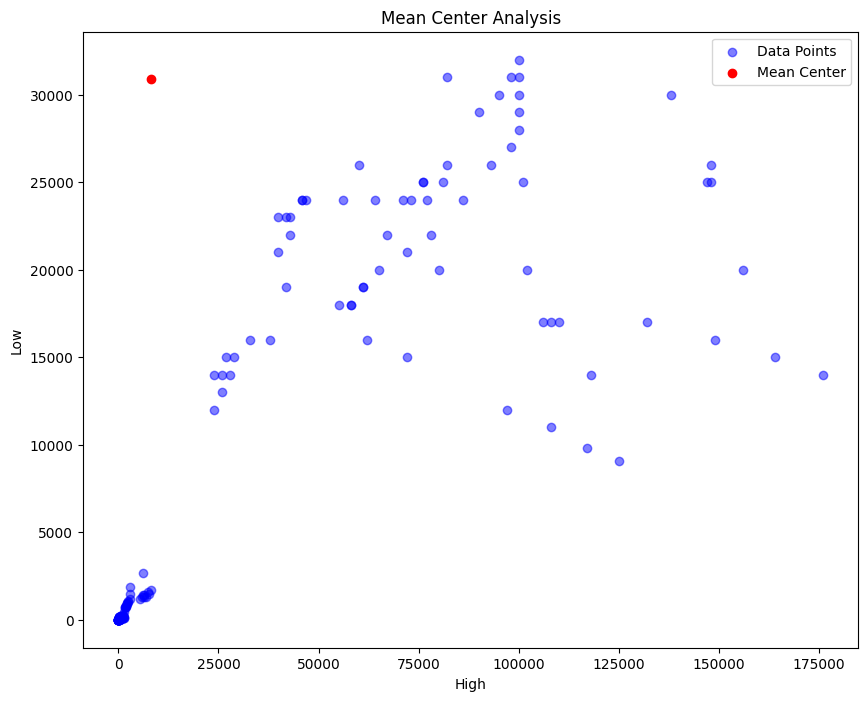

In [16]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load shapefile for boundaries
zimbabwe_shp = gpd.read_file("/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp")

zimbabwe_shp.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.show()

# Load CSV data
zimbabwe_tb = pd.read_csv("/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv")

# Drop rows with missing values
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)


# Extract coordinates from data
Latitude = zimbabwe_tb['High'].values
Longitude= zimbabwe_tb['Low'].values

# Calculate Mean Center
mean_center = (np.mean(Longitude), np.mean(Latitude))

# Plot Mean Center on map
fig, ax = plt.subplots(figsize=(10, 8))

# Plot data points
ax.scatter(Latitude, Longitude, color='blue', alpha=0.5, label='Data Points')

# Plot Mean Center
ax.scatter(*mean_center, color='red', label='Mean Center')

# Plot scatter plot of the points
ax.set_title('Mean Center Analysis')
ax.set_xlabel('High')
ax.set_ylabel('Low')
ax.legend()
plt.show()




This code employs GeoPandas, Pandas, and SciPy's cKDTree to analyze tuberculosis (TB) data in Zimbabwe. It begins by loading TB data from a CSV file, removing rows with missing values, and then loading a shapefile defining Zimbabwe's administrative boundaries. The latitude and longitude coordinates are extracted from the TB data, and a KDTree is constructed for efficient nearest neighbor calculations. Using the KDTree, the code calculates the nearest neighbor distances and indices for each point. The results are stored in a DataFrame, sorted by distance for visualization. The plot comprises two subplots: the first one displays the TB data points on a scatter plot, while the second one presents a histogram of nearest neighbor distances, providing insights into the spatial distribution of TB cases in Zimbabwe and the clustering tendencies within the dataset.

The visualization results demonstrate the spatial distribution of TB cases in Zimbabwe and the distribution of distances to the nearest neighbor for each TB case. In the scatter plot, blue points represent TB data points across Zimbabwe, illustrating the geographic locations of TB cases. The histogram of nearest neighbor distances depicts the frequency distribution of distances between TB cases and their nearest neighbors. This histogram provides valuable information about the spatial clustering of TB cases, indicating whether TB occurrences tend to cluster closely together or exhibit a more dispersed pattern

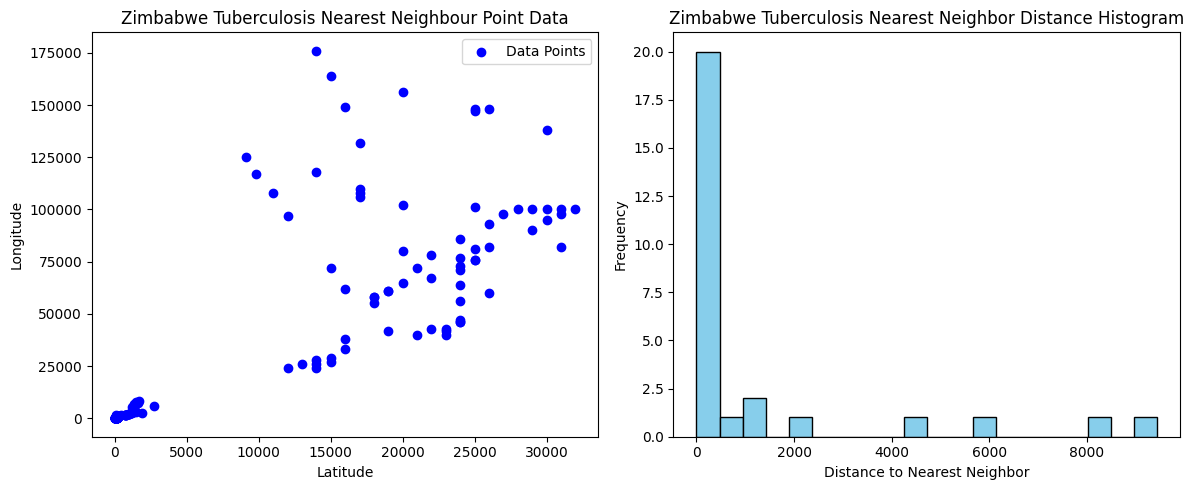

In [ ]:
import geopandas as gpd
import pandas as pd
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt

# Load the data from the CSV file
zimbabwe_tb = pd.read_csv("/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv")

# Drop rows with missing values
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)

# Load the shapefile for the boundaries
zimbabwe_shp = gpd.read_file("/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp")

# Extract coordinates from data
coords = zimbabwe_tb[['Low', 'High']].values

# Create a KDTree for nearest neighbor calculations
kdtree = cKDTree(coords)

# Calculate nearest neighbor distances and indices
distances, indices = kdtree.query(coords, k=2)  # k=2 to exclude self-matches

# Create a DataFrame for nearest neighbor information
nearest_neighbor_df = pd.DataFrame({
    'Original_Point': range(len(coords)),
    'Nearest_Point': indices[:, 1],
    'Distance': distances[:, 1]
})

# Merge with the original DataFrame if you need to retain additional information
nearest_neighbor_df = nearest_neighbor_df.merge(zimbabwe_tb, left_on='Original_Point', right_index=True)

# Sort DataFrame by distance for better visualization
nearest_neighbor_df.sort_values(by='Distance', inplace=True)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot scatter plot of the points
ax1.scatter(zimbabwe_tb['Low'], zimbabwe_tb['High'], c='blue', marker='o', label='Data Points')
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Longitude')
ax1.set_title('Zimbabwe Tuberculosis Nearest Neighbour Point Data')
ax1.legend()

# Plot histogram of nearest neighbor distances
ax2.hist(nearest_neighbor_df['Distance'], bins=20, color='skyblue', edgecolor='black')
ax2.set_xlabel('Distance to Nearest Neighbor')
ax2.set_ylabel('Frequency')
ax2.set_title('Zimbabwe Tuberculosis Nearest Neighbor Distance Histogram')

# Adjust layout
plt.tight_layout()
plt.show()



This code utilizes PySAL, GeoPandas, Pandas, and Matplotlib to perform spatial analysis and visualization of tuberculosis (TB) data in Zimbabwe. Initially, it loads the administrative boundary shapefile and TB data from CSV files using GeoPandas and Pandas, respectively. The TB data's latitude and longitude coordinates are converted into GeoPandas Points. A scatter plot is then generated, overlaying the TB data points onto the administrative boundaries map. Next, it creates a spatial weights matrix using the Queen contiguity criterion, followed by a check for NaN values in the TB data and their subsequent removal. Local Moran's I analysis is performed to identify significant spatial clusters of TB cases. The results are plotted as a Local Indicators of Spatial Association (LISA) cluster map, highlighting significant hotspots, coldspots, and spatial outliers based on their statistical significance and spatial autocorrelation.

The visualization results depict the spatial distribution of TB cases in Zimbabwe, with significant hotspots and coldspots identified through Local Moran's I analysis. The map overlays TB data points onto the administrative boundaries, providing insights into the geographic concentration of TB cases across the country. Hotspots, representing areas with a high incidence of TB and significant spatial clustering, are depicted in red, while coldspots, indicating areas with a low incidence of TB and significant spatial clustering, are depicted in blue

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.4/132.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 29.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/spaghetti/network.py:42: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)


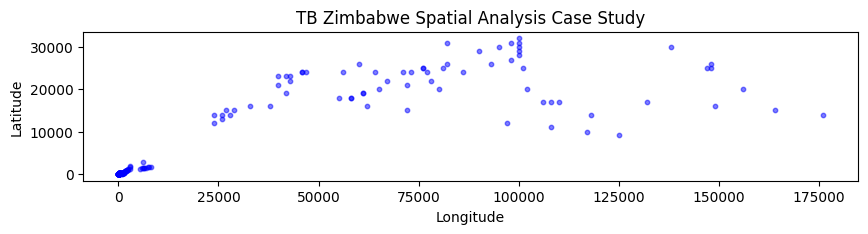

<ipython-input-19-653bffee1739>:29: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = weights.Queen.from_dataframe(zimbabwe_shp)
/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


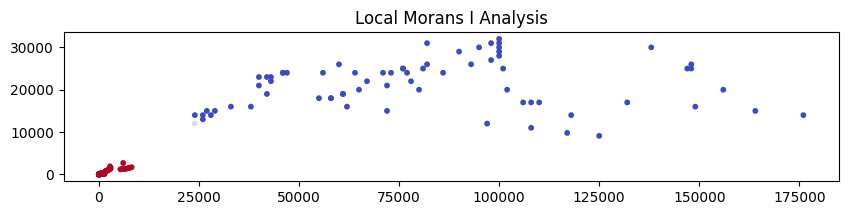

In [19]:
!pip install pysal
import pysal as ps
import numpy as np
from pysal.explore import esda
from pysal.lib import weights
from pysal.viz import mapclassify as mc
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile
zimbabwe_shp = gpd.read_file('/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp')

# Load your point data from CSV file
zimbabwe_tb = pd.read_csv('/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv')

zimbabwe_tb['geometry'] = gpd.points_from_xy(zimbabwe_tb['Low'], zimbabwe_tb['High'])

# Plot the spatial distribution of points overlaid on the shapefile
fig, ax = plt.subplots(figsize=(10, 8))
zimbabwe_shp.plot(ax=ax, color='lightgrey')
plt.scatter(zimbabwe_tb['High'], zimbabwe_tb['Low'], color='blue', s=10, alpha=0.5)
ax.set_title('TB Zimbabwe Spatial Analysis Case Study')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# Create spatial weights matrix
w = weights.Queen.from_dataframe(zimbabwe_shp)

# Check for NaN values and drop them
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)


# Perform local Moran's I analysis
Numeric = zimbabwe_tb['Numeric'].astype(np.float64)
w = weights.KNN.from_dataframe(zimbabwe_tb, k=5)
lisa = esda.Moran_Local(Numeric, w)

# Plot the LISA cluster map
fig, ax = plt.subplots(figsize=(10, 8))
zimbabwe_shp.plot(ax=ax, color='lightgrey')

# Plot significant and non-significant LISA clusters
sig = 1 * (lisa.p_sim < 0.05) # 1 if significant, 0 if not
hotspots = 1 * (lisa.q==1) # 1 if high-high, 0 otherwise
coldspots = 3 * (lisa.q==3) # 3 if low-low, 0 otherwise
dual = 2 * (lisa.q==2) # 2 if high-low, 0 otherwise
ax.scatter(zimbabwe_tb['High'], zimbabwe_tb['Low'], s=10, c=hotspots + coldspots + dual, cmap='coolwarm')
ax.set_title('Local Morans I Analysis')
plt.show()


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/libpysal/weights/distance.py:153: UserWarning: The weights matrix is not fully connected: 
 There are 4 disconnected components.
  W.__init__(self, neighbors, id_order=ids, **kwargs)


Moran's I: 0.9883869300448938
Moran's I p-value: 0.001


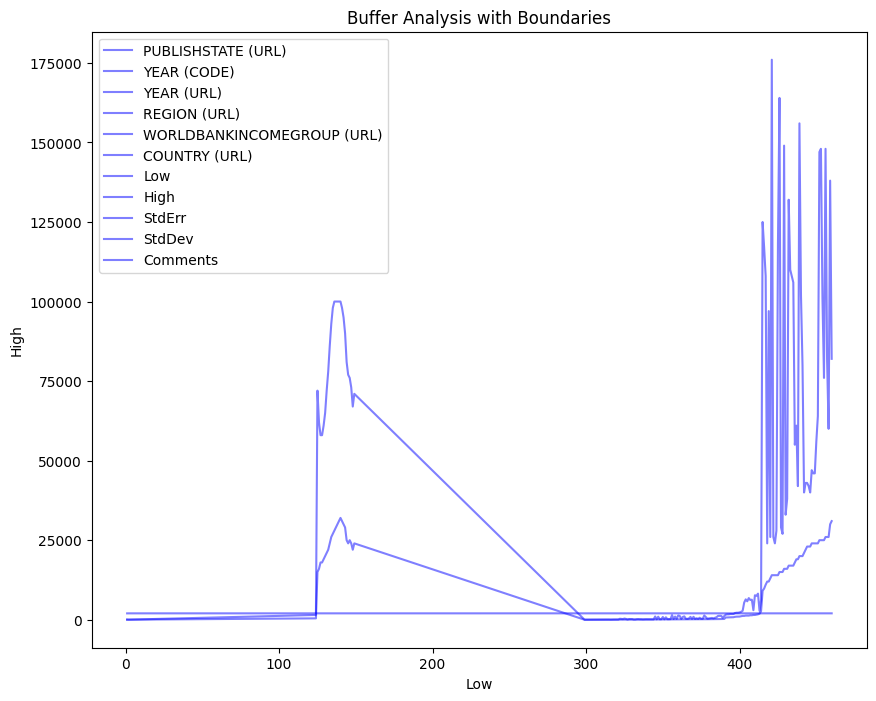

In [22]:
!pip install pysal
!pip install shapely
import pysal as ps
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pysal.explore import esda
from pysal.lib import weights
from shapely.geometry import Point

# Load shapefile for boundaries
zimbabwe_shp = gpd.read_file("/content/drive/MyDrive/TB_Zimbabwe/ZWE_adm1.shp")
# Plot boundaries
zimbabwe_shp.plot(ax=ax, color='lightgrey', edgecolor='black')
plt.show()

# Load CSV data
zimbabwe_tb = pd.read_csv("/content/drive/MyDrive/TB_Zimbabwe/tuberculosis_indicators_zwe.csv")

# Drop rows with missing values
zimbabwe_tb.dropna(subset=["Low", "High"], inplace=True)

# Convert latitude and longitude to Shapely Points
zimbabwe_tb['geometry'] = [Point(xy) for xy in zip(zimbabwe_tb['Low'], zimbabwe_tb['High'])]


# Perform spatial autocorrelation
# Assuming you have a variable 'TB_rate' for which you want to calculate spatial autocorrelation
High = zimbabwe_tb['High'].astype(float)
w = weights.KNN.from_dataframe(zimbabwe_tb, k=5)  # Use weights.KNN instead of esda.weights.KNN
mi = esda.Moran(High, w)

# Print Moran's I statistics
print("Moran's I:", mi.I)
print("Moran's I p-value:", mi.p_sim)

# Convert boundaries to a single geometry (if necessary)
boundaries_union = zimbabwe_shp.unary_union

# Buffer analysis
buffer_distance = 50  # Specify buffer distance in the units of the coordinate system
buffered_points = zimbabwe_tb.copy()
buffered_points['geometry'] = gpd.GeoSeries(buffered_points.geometry).buffer(buffer_distance)
# Visualize the results
fig, ax = plt.subplots(figsize=(10, 8))

# Plot buffered points
buffered_points.plot(ax=ax, color='blue', alpha=0.5, label='Buffered Points')

ax.set_title('Buffer Analysis with Boundaries')
ax.set_xlabel('Low')
ax.set_ylabel('High')
ax.legend()
plt.show()

